In [33]:
import easyocr
reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory
result = reader.readtext('./bia-heineken-ha-lan-5-lon-500ml-1.jpg')

In [34]:
print(result)

[([[339, 107], [449, 107], [449, 121], [339, 121]], 'M OAIGINAL OUA', 0.1354027971782245), ([[409, 225], [447, 225], [447, 239], [409, 239]], '16100', 0.060407982662757834), ([[278, 358], [523, 358], [523, 423], [278, 423]], 'Beineken', 0.2830939270477863), ([[389, 559], [453, 559], [453, 577], [389, 577]], '4f4104101', 0.024989574322962067), ([[352.14250707428744, 226.48550424457247], [403.95619995550743, 222.70728572790588], [404.85749292571256, 233.51449575542753], [353.04380004449257, 238.29271427209412]], '0118', 0.04625045508146286), ([[385.00019994001997, 230.10097970609797], [479.8017311337681, 244.60594902568022], [470.99980005998003, 288.899020293902], [377.1982688662319, 274.3940509743198]], 'LAGER', 0.9843027548814213), ([[269.9699482330199, 288.30082916896566], [367.32519828013056, 215.8402064646762], [398.0300517669801, 268.69917083103434], [299.67480171986944, 341.1597935353238]], '《NEKEN', 0.40522234850977246), ([[453.89189448205514, 271.1243357210427], [486.65227256285

In [1]:
!pip install -q inference-gpu[yolo-word]
!pip install supervision
!pip install openai-clip

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.7.0 requires botocore<1.31.65,>=1.31.16, but you have botocore 1.34.136 which is incompatible.
datasets 2.20.0 requires requests>=2.32.2, but you have requests 2.31.0 which is incompatible.
fastapi-cli 0.0.4 requires typer>=0.12.3, but you have typer 0.9.0 which is incompatible.
pylint 2.16.2 requires colorama>=0.4.5; sys_platform == "win32", but you have colorama 0.4.4 which is incompatible.


     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.4 MB 1.1 MB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.4 MB 1.5 MB/s eta 0:00:01
     ------------ --------------------------- 0.4/1.4 MB 1.7 MB/s eta 0:00:01
     ----------------- ---------------------- 0.6/1.4 MB 1.8 MB/s eta 0:00:01
     ----------------- ---------------------- 0.6/1.4 MB 1.8 MB/s eta 0:00:01
     ------------------ --------------------- 0.6/1.4 MB 1.5 MB/s eta 0:00:01
     ------------------------- -------------- 0.9/1.4 MB 1.9 MB/s eta 0:00:01
     ------------------------- -------------- 0.9/1.4 MB 1.9 MB/s eta 0:00:01
     ------------------------------- -------- 1.1/1.4 MB 1.9 MB/s e

In [38]:
for item in result:
    third_element = item[1]
    print(third_element)

M OAIGINAL OUA
16100
Beineken
4f4104101
0118
LAGER
《NEKEN
舅
OREMIUM
QUA>


In [41]:
list = ["Tiger", "Heineken", "BiaViet", "Strongbow", "Larue", "Bivina", "Edelweiss"]

In [44]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("../model/model/")

tokenizer = AutoTokenizer.from_pretrained("../model/model/")

In [45]:
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, Trainer

In [49]:
device = torch.device("cpu") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device

device(type='cpu')

In [50]:
for item in result:
    for word in list:
        tokens = tokenizer([
            [item, word]],
            truncation=True, padding=True, return_tensors='pt')

        tokens.to(device)

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

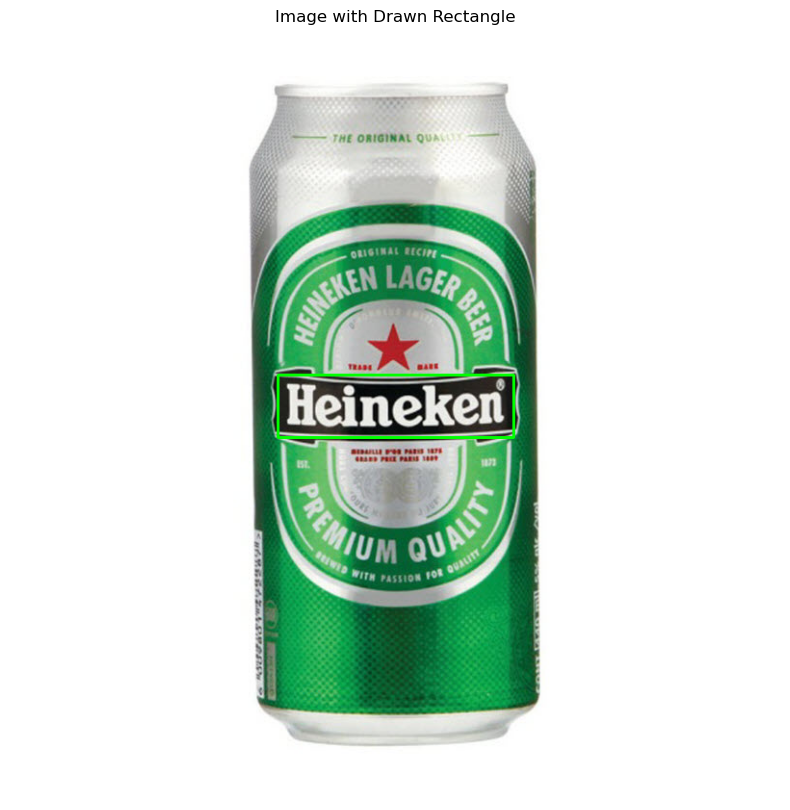

In [37]:
import cv2
import matplotlib.pyplot as plt

# Load the image (replace 'image_path' with your actual image path)
image_path = './bia-heineken-ha-lan-5-lon-500ml-1.jpg'
image = cv2.imread(image_path)

# Define the coordinates for the rectangle
rect_coords = [[278, 358], [523, 358], [523, 423], [278, 423]]

# Draw the rectangle on the image
cv2.rectangle(image, tuple(rect_coords[0]), tuple(rect_coords[2]), (0, 255, 0), 2)  # Green rectangle

# Convert the image to RGB format (since OpenCV reads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the rectangle using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.title('Image with Drawn Rectangle')
plt.show()
